# Projek Akhir Kecerdasan Buatan

### CAT vs DOG

**Anggota**
- 2009106093 - Dimas Yudha Putra Hemi Sasongko (Ketua) / Analisis dan Visualisasi
- 2009106088 - Hangberki Visnu Go                      / Pre-processing
- 2009106098 - Elvin Pratama Nugrahanto                / Modelling

### Import Library

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as img
import splitfolders
import tensorflow as tf
import os

from keras_preprocessing.image import ImageDataGenerator

## Preprocessing

In [7]:
dataset_dir = r'dataset\Cat vs Dog'

In [8]:
splitfolders.ratio(dataset_dir, output="dataset-split", ratio=(0.7,0.15,0.15))

In [9]:
train_dir = r'dataset-split\train'
test_dir = r'dataset-split\test'
val_dir = r'dataset-split\val'

In [31]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=15,
    zoom_range = 0.1,        
    horizontal_flip=True,  
    )

val_datagen = ImageDataGenerator(
    rescale=1./255
)

test_datagen = ImageDataGenerator(
    rescale=1./255
)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(200, 200), 
    classes=['cats', 'dogs'],   
    class_mode='categorical',       
    )

val_generator =  val_datagen.flow_from_directory(
    val_dir, 
    target_size=(200,200), 
    classes=['cats', 'dogs'],     
    class_mode='categorical',     
    )

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(200,200), 
    classes=['cats', 'dogs'], 
    class_mode='categorical',      
)

Found 7718 images belonging to 2 classes.
Found 1653 images belonging to 2 classes.
Found 1657 images belonging to 2 classes.


In [32]:
labels_name = ['cats', 'dogs']

## Modelling

Membangun Layer untuk model

Input Layer 
* Convolution sebesar 32 aktivasi ReLU

Hidden Layer
* Pooling 4 matrix 3 x 3
* Flatten
* Dense sebesar 256 aktivasi ReLU

Output Layer
* Dense sebesar 2 aktivasi Sigmoid

In [40]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation ='relu', input_shape = (200,200,3)),
    tf.keras.layers.MaxPool2D(2,2),    

    tf.keras.layers.Conv2D(64, (3,3), activation ='relu'),
    tf.keras.layers.MaxPool2D(2,2),
    
    tf.keras.layers.Conv2D(64, (3,3), activation ='relu'),
    tf.keras.layers.MaxPool2D((2,2)),    

    tf.keras.layers.Conv2D(128, (3,3), activation ='relu'),
    tf.keras.layers.MaxPool2D((2,2)),    

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256, activation = "relu"),
    tf.keras.layers.Dense(2, activation = "sigmoid"),
])

In [41]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 198, 198, 32)      896       
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 99, 99, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_13 (Conv2D)          (None, 97, 97, 64)        18496     
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 48, 48, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_14 (Conv2D)          (None, 46, 46, 64)        36928     
                                                                 
 max_pooling2d_14 (MaxPoolin  (None, 23, 23, 64)      

Compile model
Optimizer
* Adam dengan learning rate 0.0001

Loss 
* Metode categorical_crossentropy

Kriteria
* Akurasi

In [42]:
model.compile(optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001) , loss = "categorical_crossentropy", metrics=["accuracy"])

Melatih data berdasarkan model yang dibuat

* Epoch sebanyak 30
* Validation data
* Steps sebesar 100

In [43]:
hasil = model.fit(
    train_generator,     
    validation_data=val_generator,
    epochs = 30,    
    steps_per_epoch=100
    )

Epoch 1/30
100/100 [==============================] - 128s 1s/step - loss: 0.6817 - accuracy: 0.5625 - val_loss: 0.6595 - val_accuracy: 0.6261
Epoch 2/30
100/100 [==============================] - 122s 1s/step - loss: 0.6521 - accuracy: 0.6103 - val_loss: 0.6196 - val_accuracy: 0.6673
Epoch 3/30
100/100 [==============================] - 125s 1s/step - loss: 0.6191 - accuracy: 0.6519 - val_loss: 0.5739 - val_accuracy: 0.7120
Epoch 4/30
100/100 [==============================] - 124s 1s/step - loss: 0.5748 - accuracy: 0.7094 - val_loss: 0.5793 - val_accuracy: 0.6987
Epoch 5/30
100/100 [==============================] - 118s 1s/step - loss: 0.5700 - accuracy: 0.7034 - val_loss: 0.5401 - val_accuracy: 0.7411
Epoch 6/30
100/100 [==============================] - 117s 1s/step - loss: 0.5472 - accuracy: 0.7309 - val_loss: 0.5282 - val_accuracy: 0.7326
Epoch 7/30
100/100 [==============================] - 126s 1s/step - loss: 0.5414 - accuracy: 0.7234 - val_loss: 0.5090 - val_accuracy: 0.7574

### Visualisasi Akurasi

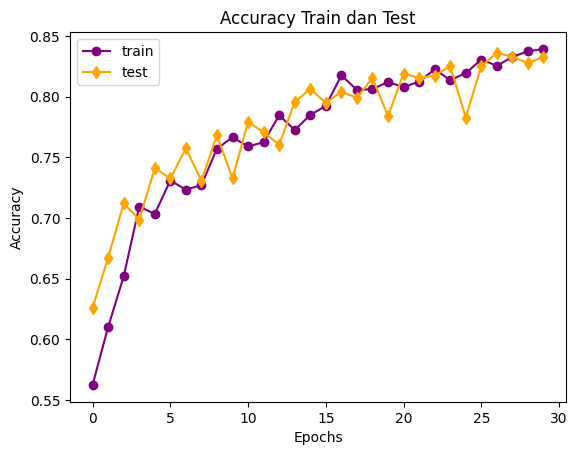

In [44]:
plt.plot(hasil.history["accuracy"],'o-',c = "purple",)
plt.plot(hasil.history["val_accuracy"], 'd-',c = "orange")
plt.title("Accuracy Train dan Test")
plt.ylabel("Accuracy")
plt.xlabel("Epochs")
plt.legend(["train", "test"])
plt.show()

### Visualisasi Loss

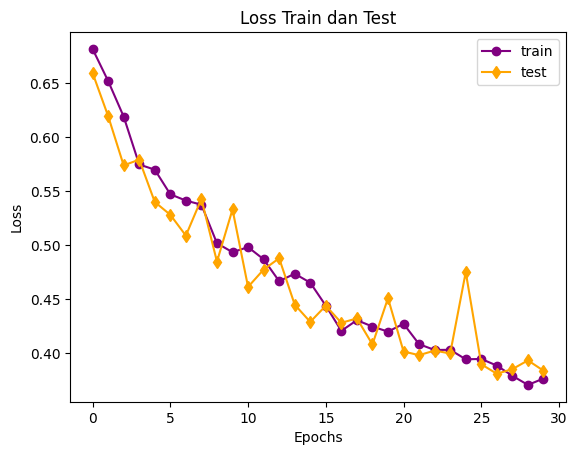

In [45]:
plt.plot(hasil.history["loss"],'o-',c = "purple",)
plt.plot(hasil.history["val_loss"],'d-',c = "orange")
plt.title("Loss Train dan Test")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend(["train", "test"])
plt.show()

### Evaluasi 

In [46]:
print("Akurasi          :", hasil.history["accuracy"][-1] * 100, "%")
print("Akurasi validasi :", hasil.history["val_accuracy"][-1] * 100, "%")

Akurasi          : 83.93750190734863 %
Akurasi validasi : 83.30308794975281 %


In [47]:
evaluate = model.evaluate(test_generator, verbose=0)

print(f'Test Loss     : {evaluate[0]}')
print(f'Test Accuracy : {(evaluate[1])}')

Test Loss     : 0.3929827809333801
Test Accuracy : 0.8316234350204468


### Prediksi

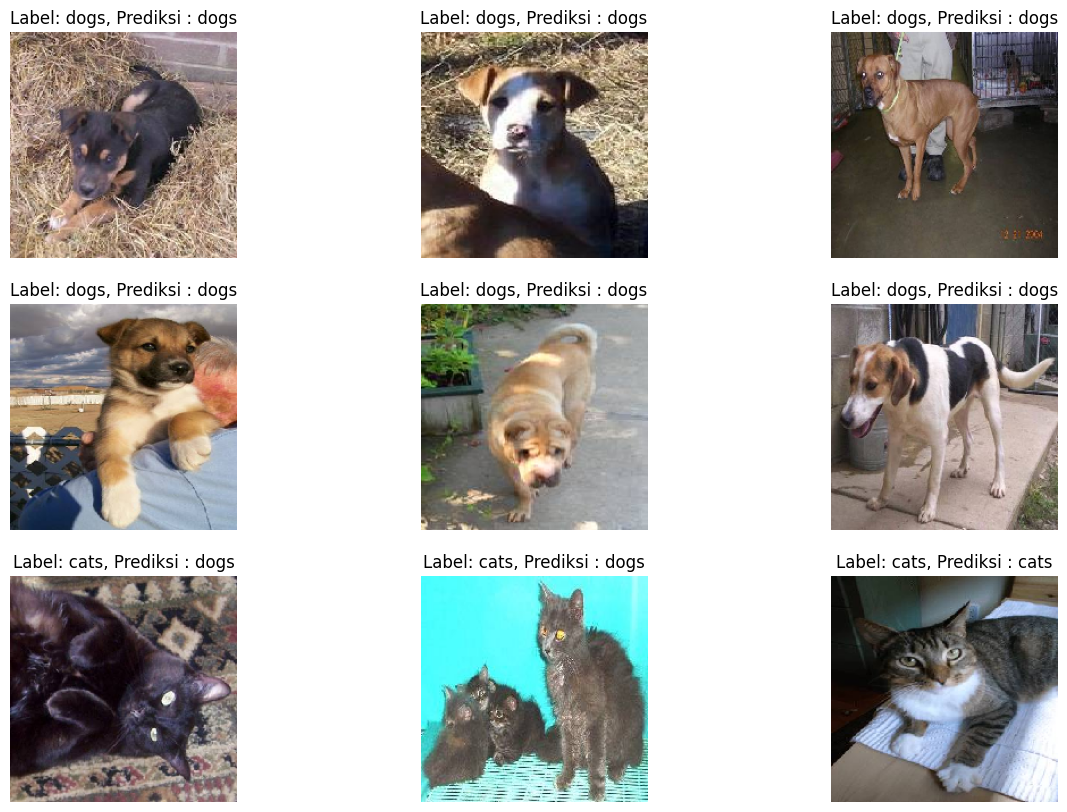

In [48]:
image, label = next(iter(test_generator))

plt.figure(figsize=(15,10))
for i in range(9) :
    TrueLabel = labels_name[np.argmax(label[i])]
    plt.subplot(3,3,i+1)
    plt.axis('off')
    y_pred = np.argmax(model.predict(image[i][None,...],verbose=0))
    plt.imshow(tf.squeeze(image[i]))
    plt.title(f'Label: {TrueLabel}, Prediksi : {labels_name[y_pred]}')